# Summary Information : v2.0 Runs #

This notebook will help guide you through the v2.0 simulations, with a short summary of the various 'families' of simulations available and some details on the individual simulations. 

The v2.0 simulations are primarily a response to the SCOC Phase 1 recommendations ([PSTN-053](https://pstn-053.lsst.io)). One of the biggest changes from previous survey simulations is that the <a href="#baseline">baseline survey</a> footprint has been modified somewhat -- the "Wide Fast Deep" area, which typically obtains on the order of 825 visits per pointing, split across 6 filters, now explicitly encompasses a low-dust-extinction area as well as a Galactic Plane extension. The overall WFD area is similar to previous simulations, and familiar mini-survey areas of the North Ecliptic Plane, the background Galactic Plane, and the South Celestial Pole fill in the remainder of the survey footprint, along with the five Deep Drilling Fields.

The primary questions we hope to address through the v2.0 series include:
* should <a href="#rolling">rolling cadence</a> be used in the LSST and if so, how best should it be deployed?
 - see the rolling, rolling_bulge, rolling_all_sky, rolling_bulge_6, rolling_six, rolling_early, and noroll families
* what fraction of the survey time should be spent on the various <a href="#mini-surveys">mini-surveys</a>, in particular the North Ecliptic Spur and the background Galactic Plane? 
 - see the vary_gp and vary_nes families, compared to baseline
* should the <a href="#nightly">nightly cadence</a> be modified, and if so, how? 
 - see the presto, presto_half, long_gaps, and long_gaps_nopairs families, compared to baseline
* should the time spent in various <a href="#filter">filters</a>, particularly bluer filters, be modified?
 - see the bluer and long_u families, compared to baseline
* what effect does varying the time devoted to <a href="#ddf">DDFs</a> have?
* what are the benefits or costs of adding various <a href="micro-surveys">micro-surveys</a>?


In [1]:
%matplotlib inline
%load_ext lab_black
%load_ext pycodestyle_magic
%flake8_on --ignore E501,W505

In [2]:
%load_ext autoreload
%autoreload 1
%aimport archive

In [3]:
import os
import numpy as np
import rubin_sim.maf as maf
from IPython.display import display

# Retrieve data on familes, runs, and metrics, and take a quick look

In [4]:
url_base = "https://raw.githubusercontent.com/lsst-pst/survey_strategy/u/neilsen/archive/fbs_2.0/"

Get the definitions and descriptions of the run families:

In [5]:
families_url = url_base + "runs_v2.0.json"
families = archive.get_family_descriptions(families_url)
families.head()

,version,reference,description,run,brief,filepath,url
family,,,,,,,
baseline,2,baseline_v2.0_10yrs,**baseline** : The v2.0 baseline simulation. T...,[baseline_v2.0_10yrs],[v2.0 baseline],[baseline/baseline_v2.0_10yrs.db],[http://epyc.astro.washington.edu/~lynnej/opsi...
retro,2,baseline_v2.0_10yrs,**retro** : The retro family provides two simu...,"[baseline_retrofoot_v2.0_10yrs, retro_baseline...","[v1.x footprint but new code capabilities, v1....","[retro/baseline_retrofoot_v2.0_10yrs.db, retro...",[http://epyc.astro.washington.edu/~lynnej/opsi...
rolling,2,baseline_v2.0_10yrs,**rolling** : The updated baseline contains a ...,"[rolling_ns2_rw0.5_v2.0_10yrs, rolling_ns3_rw0...","[Rolling half-sky (2 regions) 50%, Rolling thi...","[rolling/rolling_ns2_rw0.5_v2.0_10yrs.db, roll...",[http://epyc.astro.washington.edu/~lynnej/opsi...
rolling_bulge,2,baseline_v2.0_10yrs,**rolling_bulge** : The updated baseline conta...,"[rolling_bulge_ns2_rw0.5_v2.0_10yrs, rolling_b...","[Roll in the bulge with 2 regions, 50%, Roll i...",[rolling_bulge/rolling_bulge_ns2_rw0.5_v2.0_10...,[http://epyc.astro.washington.edu/~lynnej/opsi...
rolling_bulge_6,2,baseline_v2.0_10yrs,**rolling_bulge_6** : The updated baseline con...,[rolling_bulge_6_v2.0_10yrs],[Roll the bulge in 6 stripes (low-dust WFD in ...,[rolling_bulge_6/rolling_bulge_6_v2.0_10yrs.db],[http://epyc.astro.washington.edu/~lynnej/opsi...


Get the values for the summary metrics for all runs:

In [6]:
summary_url = url_base + "summary_11_8.csv"
summary = archive.get_metric_summaries(summary_source=summary_url)
summary.head()

metric,fOArea fO All visits HealpixSlicer,fOArea/benchmark fO All visits HealpixSlicer,fONv MedianNvis fO All visits HealpixSlicer,fONv MinNvis fO All visits HealpixSlicer,fONv/benchmark MedianNvis fO All visits HealpixSlicer,fONv/benchmark MinNvis fO All visits HealpixSlicer,fOArea_750 fO All visits HealpixSlicer,Median Parallax Error (18k) Parallax Error @ 22.4 All visits HealpixSlicer,95th Percentile Parallax Error Parallax Error @ 22.4 All visits HealpixSlicer,Mean Parallax Error @ 22.4 All visits HealpixSlicer,...,Rms AGN SF_error z band HealpixSlicer,Median AGN SF_error z band HealpixSlicer,Max AGN SF_error z band HealpixSlicer,Min AGN SF_error z band HealpixSlicer,N(+3Sigma) AGN SF_error z band HealpixSlicer,N(-3Sigma) AGN SF_error z band HealpixSlicer,AGN SF_error z band HealpixSlicer,25th%ile AGN SF_error z band HealpixSlicer,75th%ile AGN SF_error z band HealpixSlicer,AreaThreshold AGN SF_error z band HealpixSlicer
run,,,,,,,,,,,,,,,,,,,,,
baseline_nexp2_v1.7.1_10yrs,14469.422443,0.803857,846.0,781.0,1.025455,0.946667,18140.492848,2.324527,10.248834,4.894587,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
baseline_retrofoot_v2.0_10yrs,17510.183320,0.972788,875.0,806.0,1.060606,0.976970,18175.743181,2.316875,9.982240,5.003306,...,0.028529,0.041893,0.375231,0.021676,510.0,0.0,28239.0,0.036523,0.058473,10157.970988
baseline_v2.0_10yrs,12893.228978,0.716290,839.0,787.0,1.016970,0.953939,18620.568813,2.423048,10.034633,4.640184,...,0.028729,0.042319,0.397783,0.020434,564.0,0.0,29529.0,0.037055,0.055711,9874.289736
bluer_indx0_v2.0_10yrs,12849.585708,0.713866,839.0,788.0,1.016970,0.955152,18610.497289,2.350626,10.182448,4.696561,...,0.028581,0.042704,0.324028,0.018749,606.0,0.0,29590.0,0.037204,0.056184,9416.035406
bluer_indx1_v2.0_10yrs,12876.443105,0.715358,839.0,788.0,1.016970,0.955152,18601.265059,2.362545,9.878032,4.456829,...,0.028097,0.042427,0.349829,0.018333,530.0,0.0,29542.0,0.037006,0.056446,9976.683561


There are a lot of metrics. Get definitions of subsets of metrics in which we might be interested, and some recommended plotting parameters:

In [7]:
metrics_url = url_base + "metric_sets.json"
metrics = archive.get_metric_sets(metrics_url)
metrics.head()

metric  \
metric set metric                                                                                                  
srd        fONv MedianNvis fO All visits HealpixSlicer               fONv MedianNvis fO All visits HealpixSlicer   
           Median Parallax Error (18k) Parallax Error @ 22...  Median Parallax Error (18k) Parallax Error @ 2...   
           Median Parallax Error (18k) Parallax Error @ 24...  Median Parallax Error (18k) Parallax Error @ 2...   
           Median Proper Motion Error (18k) Proper Motion ...  Median Proper Motion Error (18k) Proper Motion...   
           Median Proper Motion Error (18k) Proper Motion ...  Median Proper Motion Error (18k) Proper Motion...   

                                                                             short_name  \
metric set metric                                                                         
srd        fONv MedianNvis fO All visits HealpixSlicer                  fONv MedianNvis   
           Median Parallax Error (18k) Parallax Error @ 22...  Med Parallax Error @22.4   
           Median Parallax Error (18k) Parallax Error @ 24...  Med Parallax Error @24.0   
           Median Proper Motion Error (18k) Proper Motion ...        Med PM Error @20.5   
           Median Proper Motion Error (18k) Proper Motion ...        Med PM Error @24.0   

                                                                           short_names_norm  \
metric set metric                                                                             
srd        fONv MedianNvis fO All visits HealpixSlicer                      fONv MedianNvis   
           Median Parallax Error (18k) Parallax Error @ 22...  1 / Med Parallax Error @22.4   
           Median Parallax Error (18k) Parallax Error @ 24...  1 / Med Parallax Error @24.0   
           Median Proper Motion Error (18k) Proper Motion ...        1 / Med PM Error @20.5   
           Median Proper Motion Error (18k) Proper Motion ...         1 /Med PM Error @24.0   

                                                              style  invert  \
metric set metric                                                             
srd        fONv MedianNvis fO All visits HealpixSlicer           k-   False   
           Median Parallax Error (18k) Parallax Error @ 22...    c-    True   
           Median Parallax Error (18k) Parallax Error @ 24...    c:    True   
           Median Proper Motion Error (18k) Proper Motion ...    r-    True   
           Median Proper Motion Error (18k) Proper Motion ...    r:    True   

                                                                 mag  
metric set metric                                                     
srd        fONv MedianNvis fO All visits HealpixSlicer         False  
           Median Parallax Error (18k) Parallax Error @ 22...  False  
           Median Parallax Error (18k) Parallax Error @ 24...  False  
           Median Proper Motion Error (18k) Proper Motion ...  False  
           Median Proper Motion Error (18k) Proper Motion ...  False

## Available simulation families

Get a list of families and the number of runs in each family:

In [8]:
families["run"].apply(len)

family
baseline             1
retro                2
rolling              4
rolling_bulge        3
rolling_bulge_6      1
rolling_six          2
rolling_early        1
rolling_all_sky      1
noroll               1
bluer                2
long_u               2
vary_nes            14
vary_gp             14
presto              12
presto_half         12
long_gaps           16
long_gaps_nopair    16
vary_expt            1
ddf                  2
microsurveys        19
Name: run, dtype: int64

<a id='baseline'></a>

# Define a shorthand to give everything we want for a family

`archive.describe_families` does everything we need, but for this notebook we will want to pass it the same data and parameters a bunch of times. So, define a short-hand to make our lives easier:

In [9]:
def describe_family(family):
    result = archive.describe_families(
        families.loc[[family], :],
        summary=summary,
        table_metric_set=metrics.loc[["short"], :],
        plot_metric_set=metrics.loc[["area"], :],
        baseline_run=families.loc[family, "reference"],
    )
    return result

### Baseline ### 

The updated baseline simulation! And some additional simulations that might help in translating from the older sims.

In [10]:
archive.describe_families(
    families.loc[["baseline"]], summary, table_metric_set=metrics.loc[["short"]]
)

---
**baseline** : The v2.0 baseline simulation. This features a modified survey footprint with expanded dust-free area and WFD-level visits in the Galactic Bulge and Magellanic Clouds. Coverage of the Northern Ecliptic Spur, South Celestial Pole, and remainder of the Galactic Plane is maintained, at lower levels. Filter balance is modified in different areas of the sky. A 2-region rolling cadence is used in the dust-free WFD sky, to improve cadence.   
**version**: 2  
**runs**:  


,brief,fOArea fO All visits HealpixSlicer,Effective Area (deg) ExgalM5_with_cuts i band non-DD year 10 HealpixSlicer,Nvisits All props,fONv MedianNvis fO All visits HealpixSlicer,Median NVisits u band HealpixSlicer,Median NVisits g band HealpixSlicer,Median NVisits r band HealpixSlicer,Median NVisits i band HealpixSlicer,Median NVisits z band HealpixSlicer,Median NVisits y band HealpixSlicer
run,,,,,,,,,,,
baseline_v2.0_10yrs,v2.0 baseline,12893.228978,16711.17577,2086980.0,839.0,54.0,70.0,178.0,180.0,160.0,166.0


0.0 180.0 -180.0 180.0


Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes


{'SkyMap': 1, 'Histogram': 2}

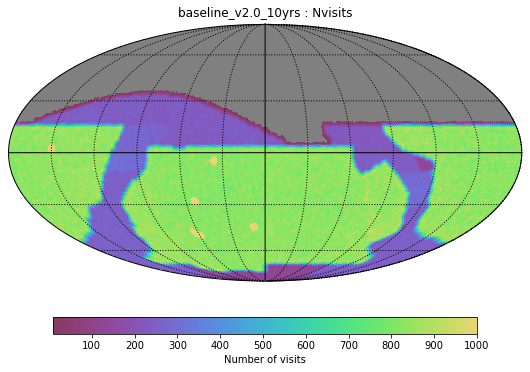

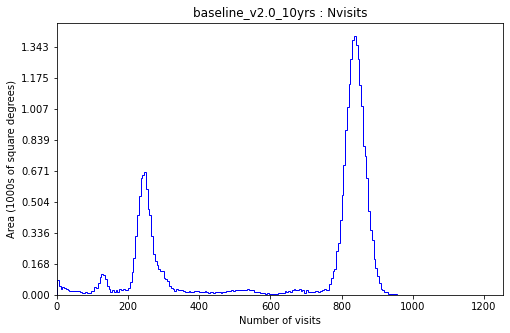

In [11]:
# Since the footprint is modified a bit, let's check it out
nvisits = maf.MetricBundle.load("baseline_v2_0_10yrs_Nvisits_HEAL.npz")
nvisits.setPlotDict(
    {
        "colorMin": 10,
        "colorMax": 1000,
        "xlabel": "Number of visits",
        "figsize": (8, 5),
        "xMin": 0,
        "bins": np.arange(0, 1200, 5),
    }
)
nvisits.plot()

To help with understanding changes from baseline_nexp2_v1.7.1_10yrs or other previous simulations in the 1.x releases, we also added the `retro` family. 

---
**retro** : The retro family provides two simulations to bridge the gap between previous sets of simulations and the updated baseline. One (retro_baseline) uses the current code base to re-run the previous baseline (i.e. this is baseline_nexp2_v1.7.1_10yrs, but run with rubin_sim) while the other (retrofoot) uses updated code settings but re-creates the baseline_nexp2_v1.7.1_10yrs footprint. These are primarily intended to help users understand potential changes in their metric results from the 1.x series of runs to the v2.0 runs, as well as the modification from sims_maf to rubin_sim.  
**version**: 2  
**runs**:  


,brief,fOArea fO All visits HealpixSlicer,Effective Area (deg) ExgalM5_with_cuts i band non-DD year 10 HealpixSlicer,Nvisits All props,fONv MedianNvis fO All visits HealpixSlicer,Median NVisits u band HealpixSlicer,Median NVisits g band HealpixSlicer,Median NVisits r band HealpixSlicer,Median NVisits i band HealpixSlicer,Median NVisits z band HealpixSlicer,Median NVisits y band HealpixSlicer
run,,,,,,,,,,,
baseline_retrofoot_v2.0_10yrs,v1.x footprint but new code capabilities,17510.183320,14959.569932,2086534.0,875.0,56.0,79.0,185.0,188.0,166.0,173.0
retro_baseline_v2.0_10yrs,v1.x baseline with rubin_sim (without new code capabilities),14611.263069,15095.535503,2048566.0,848.0,53.0,74.0,180.0,180.0,161.0,172.0


(<Figure size 432x432 with 1 Axes>, <AxesSubplot:>)

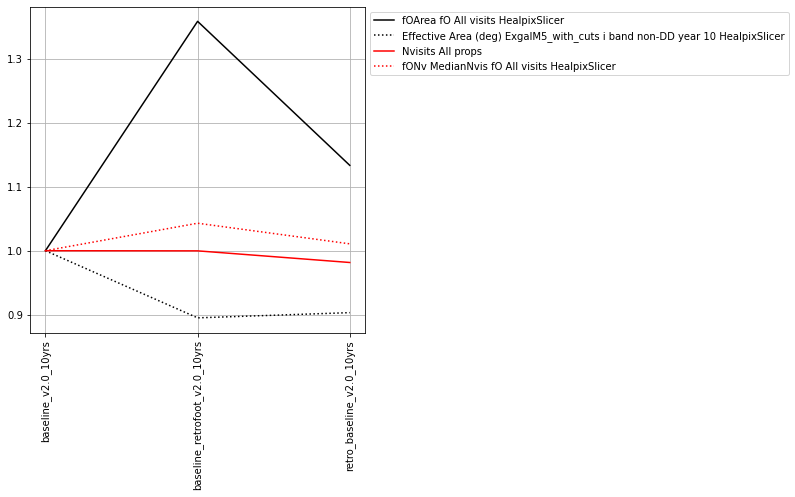

In [12]:
describe_family("retro")

You can see some differences -- the v2.0 footprint requires slightly more survey time to cover an overall larger footprint on the sky, so the amount of area with much more than 825 visits per pointing drops. The median value of 'Number of visits per position on the sky' is still above 825 over an 18,000 sq deg area, but it's much closer to 825 than it used to be (so the tails of this distribution bring the amount of area with strictly > 825 visits per pointing down, compared to the v1.x footprint).

<a id='rolling'></a>

### Rolling cadence ###

The updated baseline includes a 2-region rolling cadence throughout the dust-free WFD. However, there are other options for rolling cadence, including no rolling cadence. These families look at some options.

---
**rolling** : The updated baseline contains a 2-band rolling cadence with strength ~90% in the dust-free WFD. These simulations extend upon and modify this rolling cadence in the dust-free WFD including using 3 regions instead of 2, and adding variable weight ("strength") to the level of rolling.  
**version**: 2  
**runs**:  


,brief,fOArea fO All visits HealpixSlicer,Effective Area (deg) ExgalM5_with_cuts i band non-DD year 10 HealpixSlicer,Nvisits All props,fONv MedianNvis fO All visits HealpixSlicer,Median NVisits u band HealpixSlicer,Median NVisits g band HealpixSlicer,Median NVisits r band HealpixSlicer,Median NVisits i band HealpixSlicer,Median NVisits z band HealpixSlicer,Median NVisits y band HealpixSlicer
run,,,,,,,,,,,
rolling_ns2_rw0.5_v2.0_10yrs,Rolling half-sky (2 regions) 50%,12614.583488,16807.694539,2084510.0,838.0,54.0,69.0,177.0,180.0,160.0,166.0
rolling_ns3_rw0.5_v2.0_10yrs,Rolling third-sky (3 regions) 50%,12729.566717,16873.159443,2085499.0,838.0,54.0,70.0,177.0,180.0,160.0,166.0
rolling_ns2_rw0.9_v2.0_10yrs,Rolling half-sky (2 regions) 90%,12893.228978,16711.175770,2086980.0,839.0,54.0,70.0,178.0,180.0,160.0,166.0
rolling_ns3_rw0.9_v2.0_10yrs,Rolling third-sky (3 regions) 90%,13255.803832,16568.495850,2090909.0,841.0,54.0,70.0,178.0,181.0,160.0,167.0


---
**rolling_bulge** : The updated baseline contains a 2-band rolling cadence with strength ~90% in the dust-free WFD. These simulations add a rolling cadence in the WFD-level area of the galactic plane. The rolling in the bulge is implemented in 2-regions, with varying weights (or strengths).  
**version**: 2  
**runs**:  


,brief,fOArea fO All visits HealpixSlicer,Effective Area (deg) ExgalM5_with_cuts i band non-DD year 10 HealpixSlicer,Nvisits All props,fONv MedianNvis fO All visits HealpixSlicer,Median NVisits u band HealpixSlicer,Median NVisits g band HealpixSlicer,Median NVisits r band HealpixSlicer,Median NVisits i band HealpixSlicer,Median NVisits z band HealpixSlicer,Median NVisits y band HealpixSlicer
run,,,,,,,,,,,
rolling_bulge_ns2_rw0.5_v2.0_10yrs,"Roll in the bulge with 2 regions, 50%",12600.315496,16868.962975,2084413.0,838.0,54.0,69.0,177.0,180.0,160.0,166.0
rolling_bulge_ns2_rw0.8_v2.0_10yrs,"Roll in the bulge with 2 regions, 80%",12733.763185,16664.175326,2086550.0,838.0,54.0,70.0,178.0,180.0,161.0,166.0
rolling_bulge_ns2_rw0.9_v2.0_10yrs,"Roll in the bulge with 2 regions, 90%",12940.229422,16706.140008,2087907.0,840.0,54.0,70.0,178.0,180.0,160.0,166.0


---
**rolling_bulge_6** : The updated baseline contains a 2-band rolling cadence with strength ~90% in the dust-free WFD. This simulation add a 6-region rolling cadence to the galactic bulge WFD-level area in addition.  
**version**: 2  
**runs**:  


,brief,fOArea fO All visits HealpixSlicer,Effective Area (deg) ExgalM5_with_cuts i band non-DD year 10 HealpixSlicer,Nvisits All props,fONv MedianNvis fO All visits HealpixSlicer,Median NVisits u band HealpixSlicer,Median NVisits g band HealpixSlicer,Median NVisits r band HealpixSlicer,Median NVisits i band HealpixSlicer,Median NVisits z band HealpixSlicer,Median NVisits y band HealpixSlicer
run,,,,,,,,,,,
rolling_bulge_6_v2.0_10yrs,Roll the bulge in 6 stripes (low-dust WFD in 2 regions),12492.885909,16606.264064,2085745.0,838.0,53.0,69.0,177.0,180.0,160.0,166.0


---
**rolling_six** : The updated baseline contains a 2-band rolling cadence with strength ~90% in the dust-free WFD. These simulations modify this rolling cadence in the dust-free WFD to use 6 regions instead of 2, with variable weight ("strength") to the level of rolling.  
**version**: 2  
**runs**:  


,brief,fOArea fO All visits HealpixSlicer,Effective Area (deg) ExgalM5_with_cuts i band non-DD year 10 HealpixSlicer,Nvisits All props,fONv MedianNvis fO All visits HealpixSlicer,Median NVisits u band HealpixSlicer,Median NVisits g band HealpixSlicer,Median NVisits r band HealpixSlicer,Median NVisits i band HealpixSlicer,Median NVisits z band HealpixSlicer,Median NVisits y band HealpixSlicer
run,,,,,,,,,,,
six_rolling_ns6_rw0.5_v2.0_10yrs,Rolling in one-sixth sky (6 regions) 50%,12342.652346,16665.014619,2084148.0,837.0,54.0,70.0,177.0,180.0,159.0,166.0
six_rolling_ns6_rw0.9_v2.0_10yrs,Rolling in one-sixth sky (6 regions) 90%,12735.441772,16336.011510,2089610.0,841.0,53.0,70.0,177.0,180.0,160.0,167.0


---
**rolling_early** : The updated baseline contains a 2-band rolling cadence with strength ~90% in the dust-free WFD. In the baseline, rolling cadence starts at year 1.5 and ends at 8.5, so that each rolling "season" is an entire season length. This simulation modifies the timing, so that rolling starts at the end of year 1 and ends at year 9. The time available for rolling is longer, although may be split; the time available for all-sky surveying for astrometric purposes is maintained. Data releases may be potentially more uniform (TBD).  
**version**: 2  
**runs**:  


,brief,fOArea fO All visits HealpixSlicer,Effective Area (deg) ExgalM5_with_cuts i band non-DD year 10 HealpixSlicer,Nvisits All props,fONv MedianNvis fO All visits HealpixSlicer,Median NVisits u band HealpixSlicer,Median NVisits g band HealpixSlicer,Median NVisits r band HealpixSlicer,Median NVisits i band HealpixSlicer,Median NVisits z band HealpixSlicer,Median NVisits y band HealpixSlicer
run,,,,,,,,,,,
roll_early_v2.0_10yrs,Start rolling year 1,12999.819271,16536.602692,2088889.0,840.0,54.0,70.0,178.0,180.0,160.0,167.0


---
**rolling_all_sky** : The updated baseline contains a 2-band rolling cadence with strength ~90% in the dust-free WFD. This simulations adds a 2-region rolling cadence on all parts of the sky, including all parts of the galactic plane, the northern ecliptic spur, and the south celestial pole.  
**version**: 2  
**runs**:  


,brief,fOArea fO All visits HealpixSlicer,Effective Area (deg) ExgalM5_with_cuts i band non-DD year 10 HealpixSlicer,Nvisits All props,fONv MedianNvis fO All visits HealpixSlicer,Median NVisits u band HealpixSlicer,Median NVisits g band HealpixSlicer,Median NVisits r band HealpixSlicer,Median NVisits i band HealpixSlicer,Median NVisits z band HealpixSlicer,Median NVisits y band HealpixSlicer
run,,,,,,,,,,,
rolling_all_sky_ns2_rw0.9_v2.0_10yrs,Roll on all parts of the sky,12900.782621,16599.549715,2088105.0,839.0,54.0,69.0,178.0,180.0,160.0,166.0


(<Figure size 432x432 with 1 Axes>, <AxesSubplot:>)

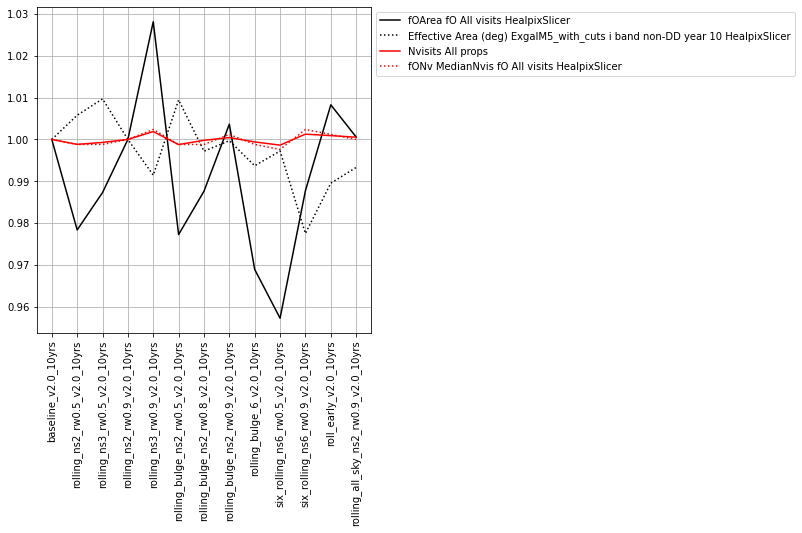

In [13]:
# We cannot use our shorthand here, because we want to match a bunch of families.

archive.describe_families(
    families.loc[families.index.str.contains("rolling"), :],
    summary=summary,
    table_metric_set=metrics.loc[["short"], :],
    plot_metric_set=metrics.loc[["area"], :],
    baseline_run=families.at["baseline", "run"][0],
)

How rolling cadence is implemented makes little difference to the overall area covered or number of visits per pointing. It will affect the cadence, however.

<a id='mini-surveys'></a>

### Mini-surveys ###

The familiar mini-surveys include the Northern Ecliptic Spur, covering the ecliptic north of the WFD survey, and the Galactic Plane, which now covers the majority of the dusty regions of the galactic plane. The South Celestial Pole is an additional mini-survey, however it already has very minimal coverage and uses a very small amount of survey time, thus we have not studied modifying its survey time in the same way we have for the NES and the GP.

---
**vary_nes** : These simulations investigate the effect of varying the amount of survey time spent on covering the North Ecliptic Spur area. The baseline characteristics, including the ratio of visits over the remainder of the footprint, are kept the same.   
**version**: 2  
**runs**:  


,brief,fOArea fO All visits HealpixSlicer,Effective Area (deg) ExgalM5_with_cuts i band non-DD year 10 HealpixSlicer,Nvisits All props,fONv MedianNvis fO All visits HealpixSlicer,Median NVisits u band HealpixSlicer,Median NVisits g band HealpixSlicer,Median NVisits r band HealpixSlicer,Median NVisits i band HealpixSlicer,Median NVisits z band HealpixSlicer,Median NVisits y band HealpixSlicer
run,,,,,,,,,,,
vary_nes_nesfrac0.01_v2.0_10yrs,NES at 1% WFD level,17534.522836,16896.659665,2087392.0,869.0,55.0,72.0,184.0,187.0,167.0,172.0
vary_nes_nesfrac0.05_v2.0_10yrs,NES at 5% WFD level,17223.144893,16868.962975,2087572.0,865.0,55.0,71.0,183.0,186.0,166.0,172.0
vary_nes_nesfrac0.10_v2.0_10yrs,NES at 10% WFD level,16779.158555,16769.087031,2087761.0,861.0,55.0,71.0,182.0,185.0,165.0,171.0
vary_nes_nesfrac0.15_v2.0_10yrs,NES at 15% WFD level,16146.331147,16760.694095,2087741.0,856.0,55.0,71.0,181.0,184.0,164.0,170.0
vary_nes_nesfrac0.20_v2.0_10yrs,NES at 20% WFD level,15380.056048,16815.248182,2087462.0,851.0,55.0,71.0,180.0,183.0,163.0,169.0
vary_nes_nesfrac0.25_v2.0_10yrs,NES at 25% WFD level,14228.545167,16691.032722,2087377.0,845.0,54.0,70.0,179.0,181.0,161.0,168.0
vary_nes_nesfrac0.30_v2.0_10yrs,NES at 30% WFD level,12893.228978,16711.175770,2086980.0,839.0,54.0,70.0,178.0,180.0,160.0,166.0
vary_nes_nesfrac0.35_v2.0_10yrs,NES at 35% WFD level,11059.372363,16583.603136,2087488.0,832.0,53.0,69.0,176.0,178.0,159.0,165.0
vary_nes_nesfrac0.40_v2.0_10yrs,NES at 40% WFD level,9061.014194,16561.781501,2087857.0,825.0,53.0,69.0,174.0,177.0,157.0,164.0


(<Figure size 432x432 with 1 Axes>, <AxesSubplot:>)

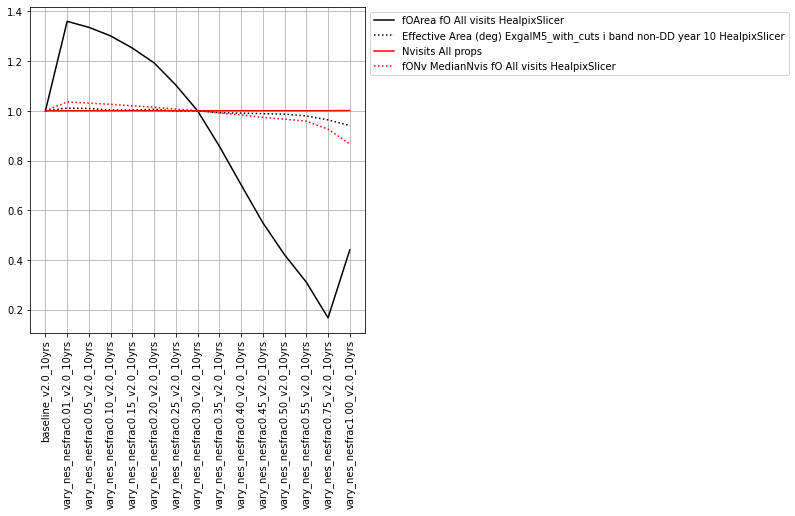

In [14]:
describe_family("vary_nes")

---
**vary_gp** : These simulations investigate the effect of varying the amount of survey time spent on covering the background (non-WFD-level) Galactic Plane area. The baseline characteristics, including the ratio of visits over the remainder of the footprint, are kept the same.  
**version**: 2  
**runs**:  


,brief,fOArea fO All visits HealpixSlicer,Effective Area (deg) ExgalM5_with_cuts i band non-DD year 10 HealpixSlicer,Nvisits All props,fONv MedianNvis fO All visits HealpixSlicer,Median NVisits u band HealpixSlicer,Median NVisits g band HealpixSlicer,Median NVisits r band HealpixSlicer,Median NVisits i band HealpixSlicer,Median NVisits z band HealpixSlicer,Median NVisits y band HealpixSlicer
run,,,,,,,,,,,
vary_gp_gpfrac0.01_v2.0_10yrs,Dusty plane at 1% WFD level,16736.354579,16818.605356,2088147.0,861.0,55.0,71.0,182.0,185.0,165.0,171.0
vary_gp_gpfrac0.05_v2.0_10yrs,Dusty plane at 5% WFD level,16665.014619,16706.140008,2088534.0,861.0,55.0,71.0,182.0,185.0,164.0,171.0
vary_gp_gpfrac0.10_v2.0_10yrs,Dusty plane at 10% WFD level,16511.423882,16810.212420,2088477.0,859.0,55.0,71.0,182.0,185.0,164.0,170.0
vary_gp_gpfrac0.15_v2.0_10yrs,Dusty plane at 15% WFD level,15621.772618,16739.711754,2088838.0,853.0,54.0,71.0,181.0,183.0,163.0,169.0
vary_gp_gpfrac0.20_v2.0_10yrs,Dusty plane at 20% WFD level,14733.799942,16736.354579,2088077.0,847.0,54.0,70.0,179.0,182.0,162.0,168.0
vary_gp_gpfrac0.25_v2.0_10yrs,Dusty plane at 25% WFD level,13427.019736,16636.478635,2088389.0,841.0,54.0,70.0,178.0,181.0,161.0,167.0
vary_gp_gpfrac0.30_v2.0_10yrs,Dusty plane at 30% WFD level,11804.665120,16665.014619,2087314.0,834.0,54.0,69.0,176.0,179.0,160.0,166.0
vary_gp_gpfrac0.35_v2.0_10yrs,Dusty plane at 35% WFD level,9751.752864,16700.264952,2086873.0,827.0,53.0,69.0,174.0,177.0,158.0,165.0
vary_gp_gpfrac0.40_v2.0_10yrs,Dusty plane at 40% WFD level,7674.501092,16560.942207,2086160.0,820.0,53.0,70.0,173.0,176.0,156.0,163.0


(<Figure size 432x432 with 1 Axes>, <AxesSubplot:>)

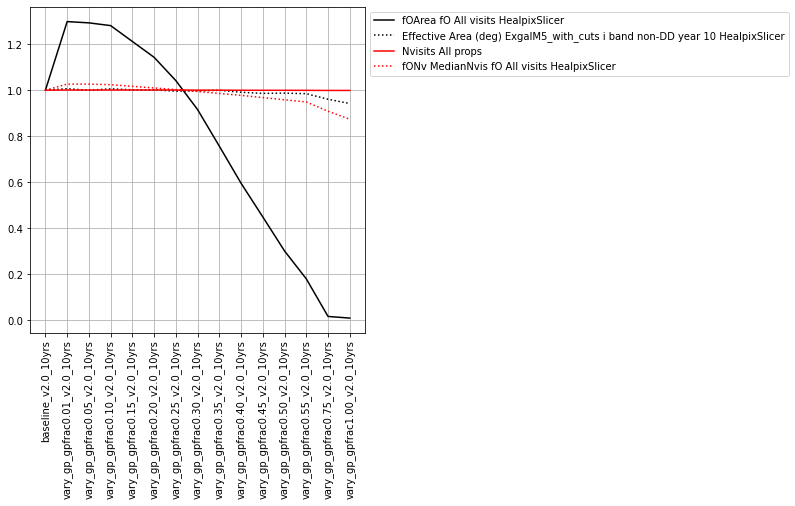

In [15]:
describe_family("vary_gp")

<a id='filter'></a>

### Filter balance ###

The SCOC phase 1 recommendations found that the standard filter balance for the low-dust WFD region was generally considered appropriate, however, there were some questions as to whether more time spent in *u* and/or *g* bands would be helpful. The families here investigate different efforts at redirecting time towards these bluer bandpasses. 

---
**bluer** : The standard filter balance in the dust-free WFD in the baseline is {'u': 0.07, 'g': 0.09, 'r': 0.22, 'i': 0.22, 'z': 0.20, 'y': 0.20}. These simulations vary the filter balance, skewing it bluer. One simulation adds visits to g band,while the other adds visits to both u and g band, in each case by taking some visits from rizy.  
**version**: 2  
**runs**:  


,brief,fOArea fO All visits HealpixSlicer,Effective Area (deg) ExgalM5_with_cuts i band non-DD year 10 HealpixSlicer,Nvisits All props,fONv MedianNvis fO All visits HealpixSlicer,Median NVisits u band HealpixSlicer,Median NVisits g band HealpixSlicer,Median NVisits r band HealpixSlicer,Median NVisits i band HealpixSlicer,Median NVisits z band HealpixSlicer,Median NVisits y band HealpixSlicer
run,,,,,,,,,,,
bluer_indx0_v2.0_10yrs,"More g - filter ratio in WFD of {'u': 0.07, 'g': 0.12, 'r': 0.21, 'i': 0.21, 'z': 0.19, 'y': 0.20}",12849.585708,16155.563377,2088051.0,839.0,53.0,94.0,170.0,171.0,152.0,166.0
bluer_indx1_v2.0_10yrs,"More u and g - filter ratio in WFD of {'u': 0.08, 'g': 0.11, 'r': 0.21, 'i': 0.21, 'z': 0.19, 'y': 0.20}",12876.443105,16210.117464,2089107.0,839.0,61.0,86.0,170.0,171.0,152.0,167.0


(<Figure size 432x432 with 1 Axes>, <AxesSubplot:>)

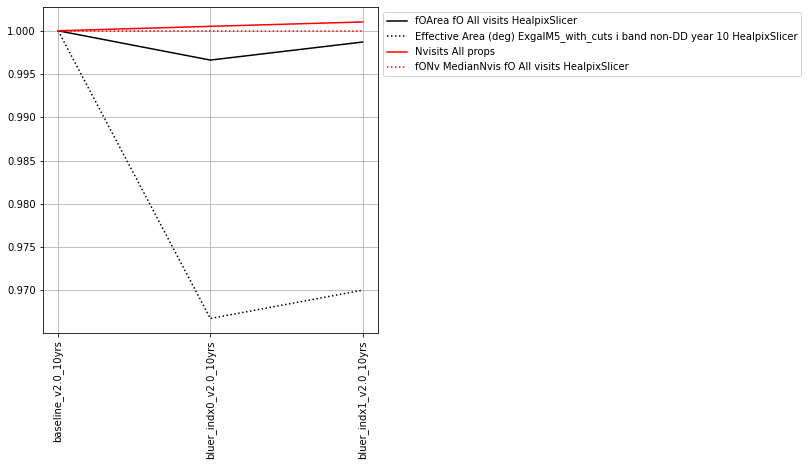

In [16]:
describe_family("bluer")

---
**long_u** : The baseline survey uses 2x15s visits for all bands except u band. In the baseline, u band visits are 1x30s to reduce the effects of readnoise (which are most extreme in u, due to the low sky-background). These simulations extend the u band visit time further, to 1x50s. In one simulation, the total amount of survey time spent on u band is kept the same, so the number of visits is reduced accordingly. In the other simulation, more survey time is spent in u band in order to maintain the number of visits in u.  
**version**: 2  
**runs**:  


,brief,fOArea fO All visits HealpixSlicer,Effective Area (deg) ExgalM5_with_cuts i band non-DD year 10 HealpixSlicer,Nvisits All props,fONv MedianNvis fO All visits HealpixSlicer,Median NVisits u band HealpixSlicer,Median NVisits g band HealpixSlicer,Median NVisits r band HealpixSlicer,Median NVisits i band HealpixSlicer,Median NVisits z band HealpixSlicer,Median NVisits y band HealpixSlicer
run,,,,,,,,,,,
long_u1_v2.0_10yrs,"u band visits 1x50s, number of u visits same as baseline",17197.966084,16420.780169,2021286.0,866.0,52.0,67.0,171.0,174.0,155.0,161.0
long_u2_v2.0_10yrs,"u band visits 1x50s, fewer number of u visits",15840.828260,16687.675548,2040731.0,854.0,33.0,70.0,177.0,181.0,160.0,167.0


(<Figure size 432x432 with 1 Axes>, <AxesSubplot:>)

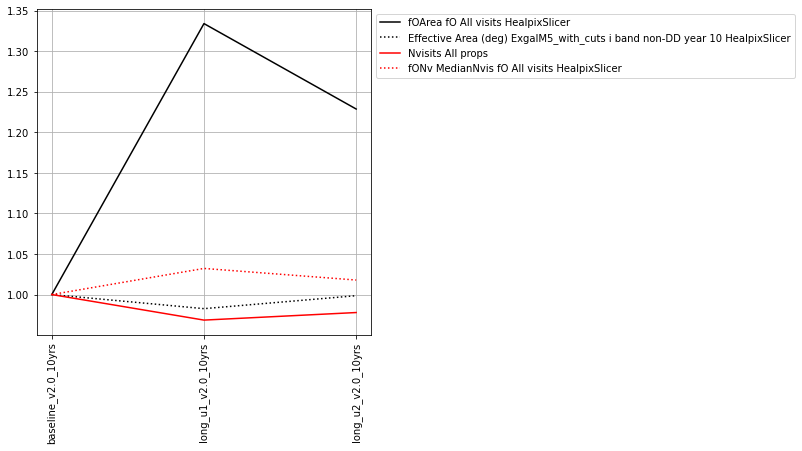

In [17]:
describe_family("long_u")

<a id='ddf'></a>

### DDF ###

The deep-drilling fields currently receive about 1% of the total survey time per DDF location. There are five DDFs, so this accounts for 5% of the total survey time. Each DDF is a single pointing, with the exception of the Euclid South DDF which is a double-pointing (so the final depths in this DDF are a little shallower). 

This family investigates the effect of spending more or less time on the DDFs. 

We do anticipate improving and extending these simulations in v2.1. 

---
**ddf** : The baseline survey strategy adds five Deep Drilling Fields, each allocated about 1% of the total survey observing time, for about 5% total. In these simulations, the amount of time allocated for DDFs is varied from 3 to 8%. It is worth noting that we anticipate implementing improvements on the DDF scheduling algorithm in the next six months, and will revisit more complicated DDF scheduling requests with that improvement in hand.  
**version**: 2  
**runs**:  


,brief,fOArea fO All visits HealpixSlicer,Effective Area (deg) ExgalM5_with_cuts i band non-DD year 10 HealpixSlicer,Nvisits All props,fONv MedianNvis fO All visits HealpixSlicer,Median NVisits u band HealpixSlicer,Median NVisits g band HealpixSlicer,Median NVisits r band HealpixSlicer,Median NVisits i band HealpixSlicer,Median NVisits z band HealpixSlicer,Median NVisits y band HealpixSlicer
run,,,,,,,,,,,
ddf_frac_ddf_per0.6_v2.0_10yrs,DDF fraction of visits reduced to 3% of total,15656.183658,16786.712198,2087949.0,853.0,55.0,71.0,180.0,183.0,163.0,169.0
ddf_frac_ddf_per1.6_v2.0_10yrs,DDF fraction of visits increased to 8%,5702.161026,16396.440653,2086426.0,811.0,52.0,67.0,171.0,174.0,155.0,161.0


(<Figure size 432x432 with 1 Axes>, <AxesSubplot:>)

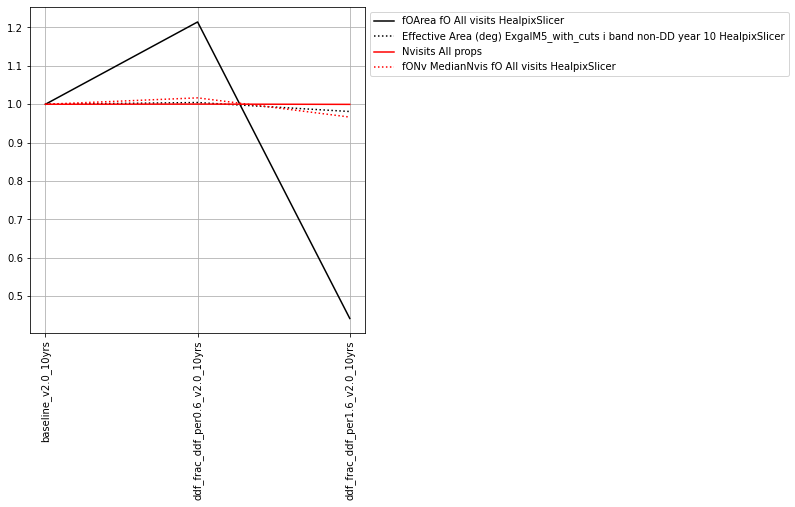

In [18]:
describe_family("ddf")

<a id='micro-surveys'></a>

### Micro-surveys ###

There are many special observing proposals that can help support and extend the LSST's primary science drivers. Many of these were submitted in response to the 2018 Call for White Papers, and many of the micro-surveys requiring between 0.3-3% of the overall survey time were simulated as part of these v2.0 simulations. The SCOC are likely to delay decisions on micro-surveys beyond the Phase 2 recommendations, but these are useful guides to both preparing to answer community priorities and to ensure that the scheduler itself has all required capabilities.

---
**microsurveys** : There are special programs which can achieve additional science beyond or supporting the primary Rubin LSST science drivers, if provided specialized observing time via "microsurveys". These simulations investigate a subset of microsurvey proposals, described further in their brief descriptions.  
**version**: 2  
**runs**:  


,brief,fOArea fO All visits HealpixSlicer,Effective Area (deg) ExgalM5_with_cuts i band non-DD year 10 HealpixSlicer,Nvisits All props,fONv MedianNvis fO All visits HealpixSlicer,Median NVisits u band HealpixSlicer,Median NVisits g band HealpixSlicer,Median NVisits r band HealpixSlicer,Median NVisits i band HealpixSlicer,Median NVisits z band HealpixSlicer,Median NVisits y band HealpixSlicer
run,,,,,,,,,,,
virgo_cluster_v2.0_10yrs,Add the virgo cluster to WFD footprint,12161.364919,16685.996960,2087802.0,836.0,54.0,70.0,177.0,179.0,160.0,165.0
carina_v2.0_10yrs,One week per year observing Carina,12519.743306,16385.529835,2087222.0,838.0,54.0,70.0,178.0,178.0,160.0,166.0
smc_movie_v2.0_10yrs,Two nights of observing the SMC in movie mode,12732.084598,16743.068928,2089048.0,838.0,54.0,69.0,177.0,180.0,160.0,167.0
roman_v2.0_10yrs,Microsurvey of the Roman bulge field,12283.062498,16671.728968,2083719.0,837.0,54.0,69.0,177.0,180.0,160.0,166.0
local_gal_bindx0_v2.0_10yrs,"Increase local galaxy coverage {'g': 0.5, 'r': 0.2, 'i': 0.1}",12330.902235,16550.870684,2087499.0,837.0,53.0,70.0,177.0,179.0,159.0,165.0
local_gal_bindx1_v2.0_10yrs,"Increasing local galaxy coverage {'g': 1.0, 'r': 0.3, 'i': 0.1}",11938.112809,16554.227858,2087949.0,836.0,52.0,72.0,177.0,178.0,159.0,164.0
local_gal_bindx2_v2.0_10yrs,"Increasing local galaxy coverage {'g': 1.5, 'r': 0.35, 'i': 0.2}",11226.391798,16456.869795,2087603.0,833.0,51.0,72.0,176.0,176.0,157.0,163.0
too_rate10_v2.0_10yrs,"Follow up ToO alerts, 10 events per year",12710.262963,16508.906001,2086250.0,838.0,54.0,70.0,177.0,180.0,160.0,166.0
too_rate50_v2.0_10yrs,"Follow up ToO alerts, 50 events per year",11628.413454,16609.621239,2079989.0,834.0,53.0,69.0,177.0,179.0,159.0,164.0


(<Figure size 432x432 with 1 Axes>, <AxesSubplot:>)

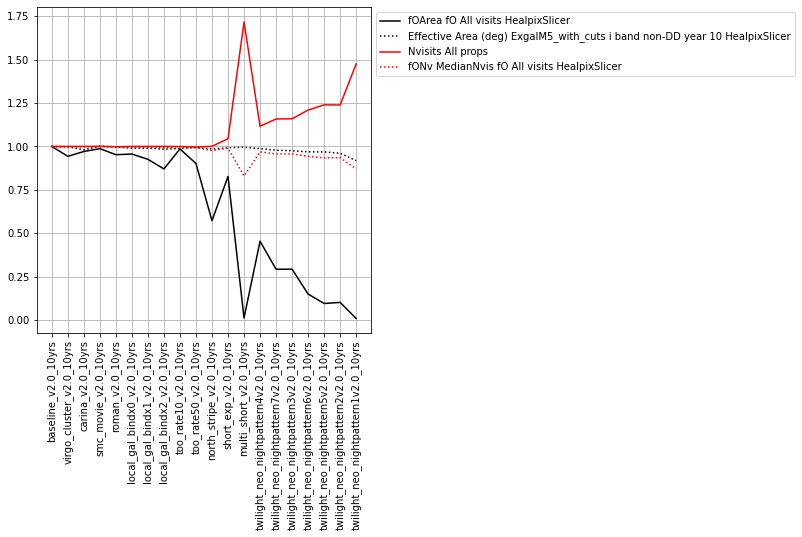

In [19]:
describe_family("microsurveys")

Especially when considering micro-surveys, it is worthwhile to remember that sometimes visits can be extremely SHORT. 

### Other simulations ###

---
**vary_expt** : The baseline survey strategy uses 2x15s visits for grizy filters, and 1x30s visits for u band. This simulation attempts to make the individual image depth more consistent by varying the exposure time depending on conditions. Each visit could have an on-sky exposure time of between 20s to 100s.  
**version**: 2  
**runs**:  


,brief,fOArea fO All visits HealpixSlicer,Effective Area (deg) ExgalM5_with_cuts i band non-DD year 10 HealpixSlicer,Nvisits All props,fONv MedianNvis fO All visits HealpixSlicer,Median NVisits u band HealpixSlicer,Median NVisits g band HealpixSlicer,Median NVisits r band HealpixSlicer,Median NVisits i band HealpixSlicer,Median NVisits z band HealpixSlicer,Median NVisits y band HealpixSlicer
run,,,,,,,,,,,
vary_expt_v2.0_10yrs,Vary the exposure times between 20 and 100s,18090.974523,16948.695871,1858421.0,934.0,49.0,62.0,157.0,160.0,140.0,147.0


(<Figure size 432x432 with 1 Axes>, <AxesSubplot:>)

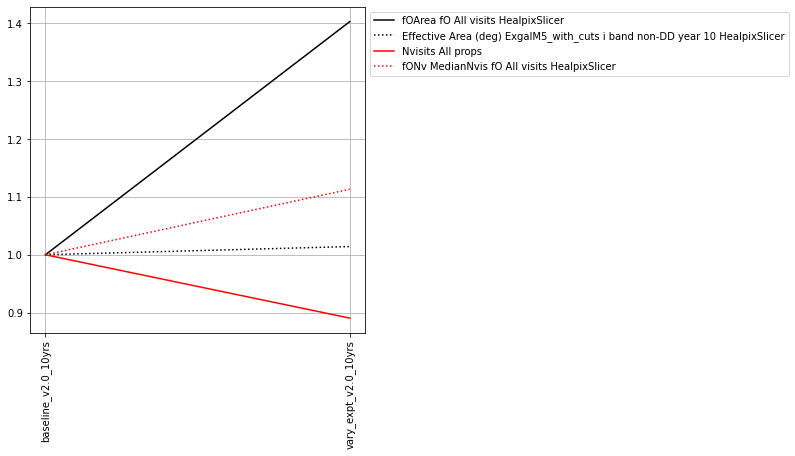

In [20]:
describe_family("vary_expt")